# API Profile: Projects

In [1]:
import base64
import requests
import pandas as pd

from itsdangerous import URLSafeTimedSerializer

In [2]:
TM_SECRET = '0cNOkuyerq9J6vEXics6nTwPnjBgFeGF1Pq6yVy9'
API_URL = 'http://127.0.0.1:5000/api/v2/'

In [3]:
def create_token(user_id):
    serializer = URLSafeTimedSerializer(TM_SECRET)
    token = serializer.dumps(user_id)
    encoded = base64.b64encode(bytes(token, 'utf-8')).decode('utf-8')

    return encoded

In [132]:
TOKEN = create_token(834883)

In [133]:
endpoints = [
    {
        'url': 'projects',
        'header': {'token': TOKEN},
        'method': 'GET',
        'params': {
            'orderBy': 'priority',
            'orderByType': 'ASC',
            'page': 1,
            'createdByMe': 'false',
            'mappedByMe': 'false',
            'favoritedByMe': 'false',
            'managedByMe': 'false',
        }
    },
    {
        'url': 'projects',
        'header': {'token': TOKEN},
        'method': 'POST',
        'params': {},
        'payload':{'projectName': 'Mapathon Bahia Blanca', 
                   'areaOfInterest': {'type': 'FeatureCollection', 'features': [{'id': '65d4fe238d4356225e599c1b72e070d0', 'type': 'Feature', 'properties': {}, 'geometry': {'coordinates': [[[-62.363229765845944, -38.70359480488574], [-62.28349668643837, -38.61738800371326], [-62.14505903208223, -38.716585238332854], [-62.25283011743514, -38.78764893912241], [-62.363229765845944, -38.70359480488574]]], 'type': 'Polygon'}}]},                    
                   'tasks': {'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'x': 167, 'y': 196, 'zoom': 9, 'isSquare': True}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-62.578124997501575, -38.82259097486486], [-61.87499999752964, -38.82259097486486], [-61.87499999752964, -38.272688534680675], [-62.578124997501575, -38.272688534680675], [-62.578124997501575, -38.82259097486486]]]]}}]}, 
                   'arbitraryTasks': False
                  }
    },
    {
        'url': 'projects/queries/bbox',
        'header': {'token': TOKEN},
        'method': 'GET',
        'params': {
            'bbox': ' 34.404,-1.034, 34.717,-0.624',
            'srid': 4326,
            'createdByMe': False
            
        }
    },    
    {
        'url': 'projects/queries/featured',
        'header': {'token': TOKEN},
        'method': 'GET',
        'params': {}
    },
    {
        'url': 'projects/queries/popular',        
        'method': 'GET',
        'params': {}        
    },
    {
        'url': 'projects/queries/{username}/touched/',
        'path':{ 'username': 'nahomy' },
        'method': 'GET',
        'params':{}
    },
    {
        'url': 'projects/{project_id}',
        'path':{ 'project_id': 16 },
        'method': 'DELETE',
        'params':{}
    },
    {
        'url': 'projects/{project_id}',
        'path':{ 'project_id': 14 },
        'method': 'GET',
        'params':{
            'as_file': False,
            'abbreviated': False
        }
    },
    {
        'url': 'projects/{project_id}/actions/feature',
        'path':{ 'project_id': 6 },
        'method': 'POST',
        'params':{},
        'payload':{}
    }
   
]



In [117]:
def calculate_time_response(endpoints, data_time_response):
    
    headers = None    
    
    for endpoint in endpoints:
        
        if 'header' in endpoint:
            headers = {'Authorization': f"Token {endpoint['header']['token']}",'Accept-Language': 'en'}
            
        if 'path' in endpoint:
            endpoint['url'] = endpoint['url'].format(**endpoint['path'])
            
        if endpoint['method'] == 'GET':
            resp = requests.get(API_URL + endpoint['url'], headers=headers, params=endpoint['params'])            
        
        elif endpoint['method'] == 'POST':
            resp = requests.post(API_URL + endpoint['url'], headers=headers, params=endpoint['params'], json=endpoint['payload'])            
            
        if endpoint['method'] == 'DELETE':
            resp = requests.delete(API_URL + endpoint['url'], headers=headers, params=endpoint['params'])
            
        if endpoint['method'] == 'PATCH':
            resp = requests.patch(API_URL + endpoint['url'], headers=headers, params=endpoint['params'], json=endpoint['payload'])

        try:
            data["Method"].append(endpoint['method'])
            data["API url"].append(endpoint['url'])
            data["Time"].append(resp.elapsed.total_seconds())
        except:
            print("connection error")

In [134]:
data = {
    "Method":[],
    "API url": [],
    "Time": []
}

def main():
    
    calculate_time_response(endpoints, data)
      
if __name__ == '__main__':
    main()


In [135]:
df = pd.DataFrame(data)
df.style

,Method,API url,Time
0,GET,projects,0.061131
1,POST,projects,2.669575
2,GET,projects/queries/bbox,0.031352
3,GET,projects/queries/featured,0.010543
4,GET,projects/queries/popular,0.024064
5,GET,projects/queries/nahomy/touched/,0.015138
6,DELETE,projects/16,0.004730
7,GET,projects/14,0.020724
8,POST,projects/6/actions/feature,0.011680


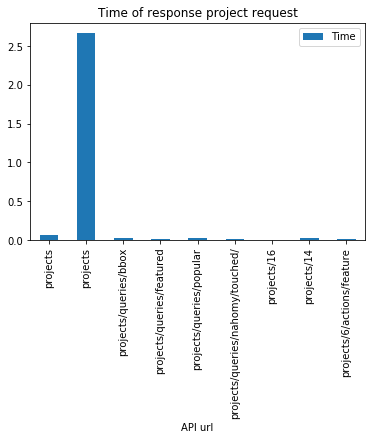

In [136]:
df.plot(title='Time of response project request', x ='API url', y='Time', kind = 'bar')